In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\kandu\Downloads\mental_health_workplace_survey.csv")
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [34]:
##EDA
print("Shape of data:",df.shape)##rows and columns included.
print("Total Rows:",df.shape[0])
print("Total Columns:",df.shape[1])
df.info() ##counts non-null

Shape of data: (3000, 27)
Total Rows: 3000
Total Columns: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non

Missing values

In [8]:
df.isnull().sum()


EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

Data Imputation

In [16]:
categorical_cols=df.select_dtypes(include='object').columns ##taking only text data type.
numerical_cols=df.select_dtypes(exclude='object').columns ##taking the int and float data types.
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].median()) ##filling the missing values with the median value.
df[categorical_cols]=df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0


Outliers

In [33]:
df['HoursPerDay']= df['WorkHoursPerWeek'] / 7

In [32]:
features=['HoursPerDay' , 'SleepHours', 'StressLevel']
def remove_outliers_IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_size = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    removed = original_size - df.shape[0]
    print(f"{removed} outliers removed from '{col}'")
    return df

for col in features:
    df = remove_outliers_IQR(df, col)

0 outliers removed from 'HoursPerDay'
0 outliers removed from 'SleepHours'
0 outliers removed from 'StressLevel'


Data visuvalization 

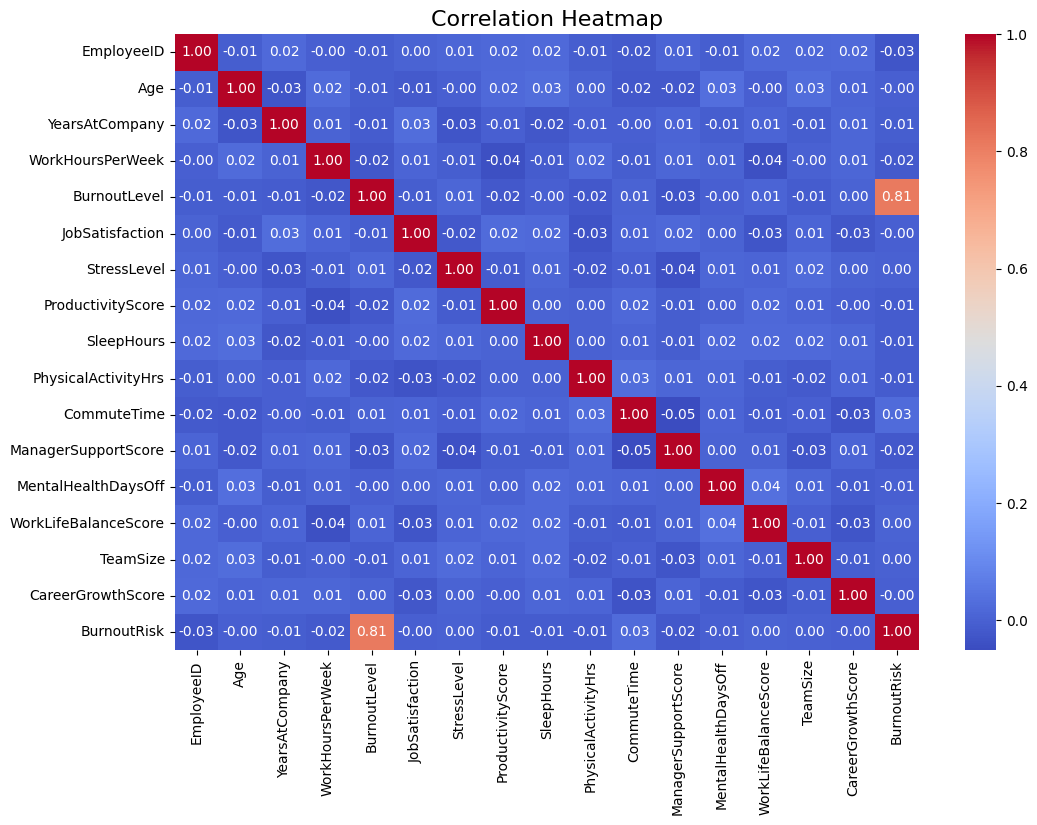

In [40]:
#Correlation Heatmap
fig,ax = plt.subplots(figsize=(12,8))##size of the fig
correlation_matrix= df[numerical_cols].corr()##calcualting the correlation the the numerical cols.
sns.heatmap(correlation_matrix , annot=True, cmap ='coolwarm', fmt='.2f', ax=ax)##plots the heatmap on the calcualted numerical correlation.
ax.set_title("Correlation Heatmap", fontsize=16)##title
plt.show()

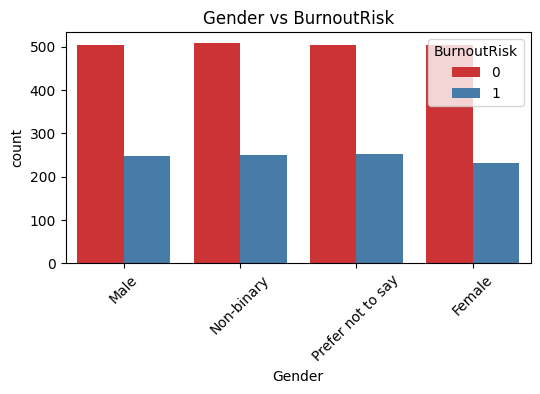

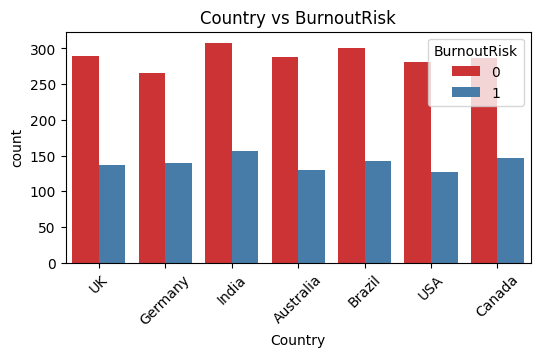

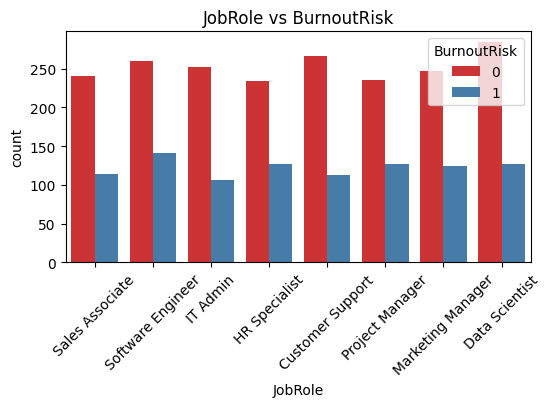

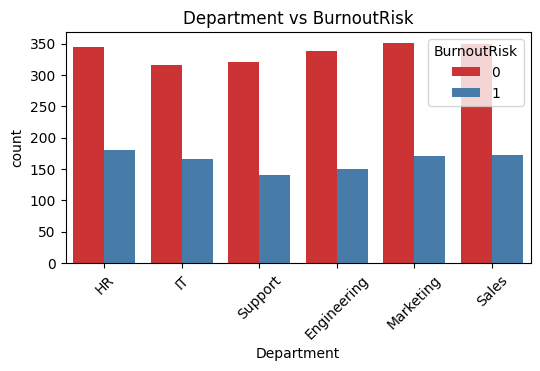

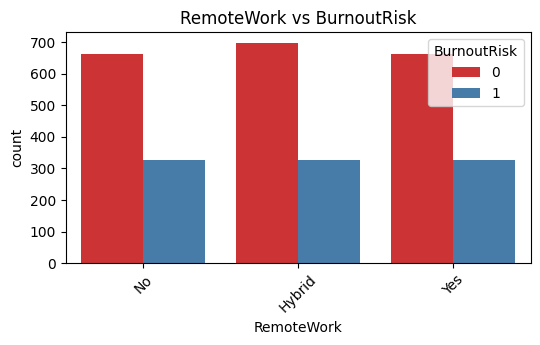

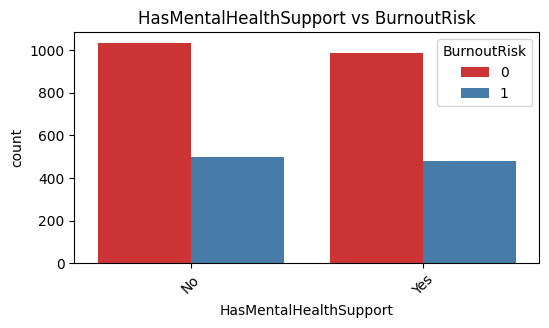

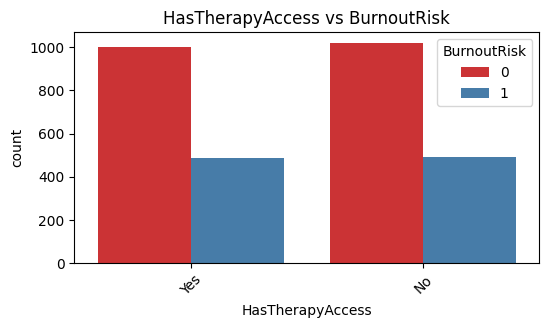

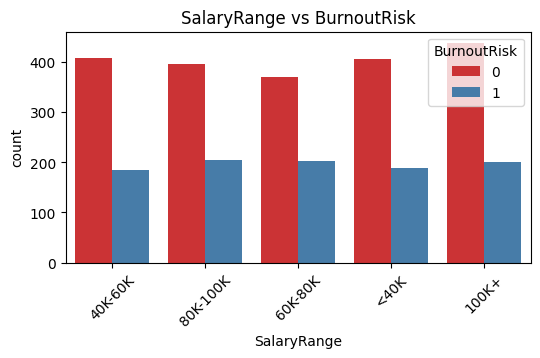

In [42]:
##countplot
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='BurnoutRisk', palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs BurnoutRisk")
    plt.show()